# Classifying red and blue galaxies with a CMD
----

This is a short demo on how I used color-magnitude diagrams to classify galaxies as red or blue in [my research](http://adsabs.harvard.edu/abs/2017MNRAS.466..496R) for [the ORELSE survey](http://iopscience.iop.org/article/10.1088/0004-6256/137/6/4867/meta). The ultimate goal of this work is to answer the question 'Are active galactic nuclei associated with galaxies that have very recently stopped producing star?' via answering the simpler question 'Are active galaxies over-represented on a color-magnitude diagram in the low density region between the blue cloud and the red sequence?' This demo doesn't answer that question, but carries out the important step off locating the blue cloud and red sequence.

### Color-Magnitude Diagrams

Classifying galaxies as 'red' or 'blue' is important in astronomy because blue galaxies are blue because they have lots of on-going or recent star formation (which creates lots of young, bright, blue, short-lived stars), while red galaxies are red because they have little to no star formation (so they are dominated by old, long-lived red stars). So, classifying red and blue galaxies is useful to examine correlations between other parameters (like if a galaxy has an AGN) and star formation.

To separate galaxies, we plot them on a color-magnitude diagram. A rough schematic of one is below. The x-axis is how bright a galaxy is, and the y-axis is its color. When plotted like this galaxies tend to cluster into the red sequence, which is relatively narrow and uniform, and the blue cloud, which is more diffuse because of the diversity of blue galaxies. In between is an area of lower density (typically called the green valley), which facilitates clustering analysis. 

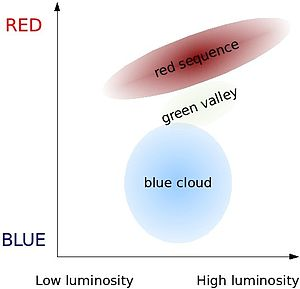

In [1]:
from IPython.core.display import Image
Image(filename='notebook_images/RedSequenceBlueCloud.jpg')

There are a several challenges associated with using CMDs to locate the red and blue clusters. First, these classifications are not easily generalized between different fields. The problem here is that the light from these galaxies is redshifted as it comes to us by the expansion of the universe. This is illustrated in the mock spectrum  below. The top panel is the rest frame, what the light looks like as it leaves the galaxy. As the light approaches us, every part of the spectrum is stretched and shifted toward redder colors (right on this plot). In the bottom panel are what this same spectrum would look like when it reached us, for three different distances. If you're observing in the energy range bounded by the dashed lines, what you see will be really different depending on the distance of the galaxy, because galaxy spectra are quite complex.

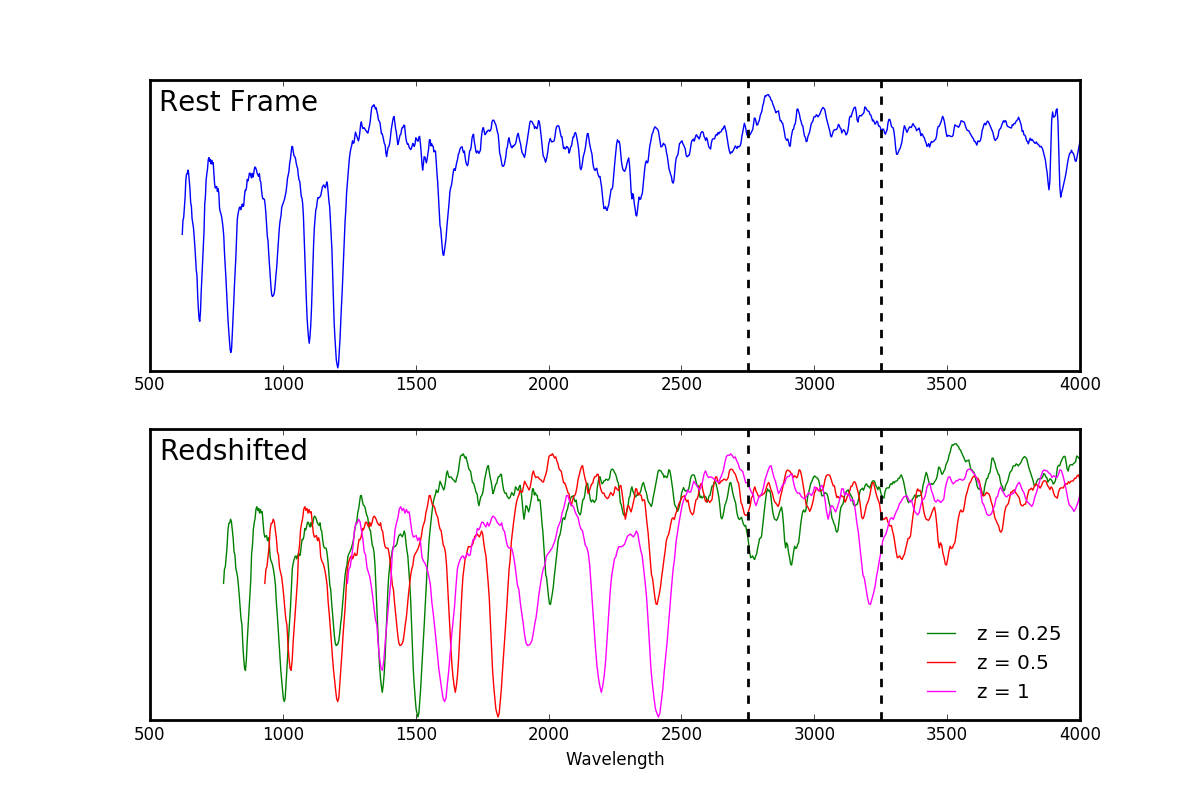

In [15]:
from IPython.core.display import Image
Image(filename='notebook_images/SpectrumRedshiftExample.png')

Because of every field is at a different redshift, and because of the complexity of galaxy spectra, we have to analyze each field separately. In addition, the data are sparse in some cases, especially for the bluer galaxies, which makes the clusters very uneven.

Let's work through some examples with real data. The first example is the Cl1604 Supercluster, the richest structure in the ORELSE survey, with the most complete observations. SC1604 is made up of 5 galaxy clusters and 3 galaxy groups, with hundreds of galaxies total. The constituent galaxies are diverse, with lots of star-forming and quiescent galaxies.

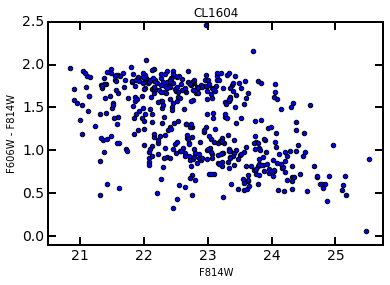

In [3]:
from CMD import *
CMD1604 = CMD()
CMD1604.set_field('cl1604')
CMD1604.load_spec()
CMD1604.set_CMD_mags()
CMD1604.plot_CMD(xmin = 20.5, xmax = 25.75, ymin = -0.1, ymax = 2.5)

This plot is similar to the CMD schematic above, but brightness increases to the left, so the x-axis is mirrored. Visually, the human eye can easily locate two clusters of points here, the top one corresponding to the red sequence and the bottom one to the blue cloud. 

To identify the red sequence cluster, we first make an initial guess at the region containing it. This region is shaped like a linear band (since the red sequence is expected to take that shape), so we specify a point the center of the red sequence passes through, a slope, and the width. The initial guess is plotted up below.

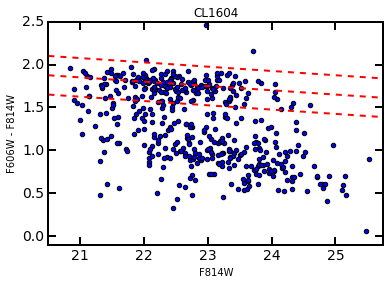

In [3]:
CMD1604.plot_CMD(xmin = 20.5, xmax = 25.75, ymin = -0.1, ymax = 2.5, show = False, plotoverride = True)
CMD1604.setRSinit(point = (23, 1.75), width = 0.45, slope = -0.05, plotCMD = False)

After we're satisfied with the intialization, we fit a line to all galaxies within that region. This line is fixed as the center of the red sequence, and a sigma-clipping routine is carried out to determine its width. Offsets from the center line are calculated for all galaxies within the width of the red sequence to do this. Objects more than 2 standard deviations away from the line are thrown out and the standard deviation is recalculated. When the sigma-clipping algorithm converges, the width of the red sequence is set as 2 of these standard deviations. 

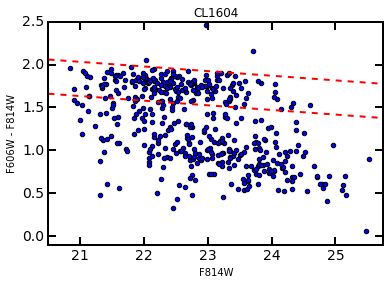

In [4]:
CMD1604.plot_CMD(xmin = 20.5, xmax = 25.75, ymin = -0.1, ymax = 2.5, show = False, plotoverride = True)
CMD1604.RSsigclip(plotCMD = False)

This region is how we define the red sequence. Since they are only two clusters of data and we've defined one, we're done, since we can define the blue cloud relative to the red sequence. This is what we chose to do: galaxies on the red sequence are classified as red, and galaxies below the red sequence are classified as blue (galaxies above the red sequence are considered outliers and are cut). 

To see how this is useful for our analysis, it is best to visualize this a bit differently. 

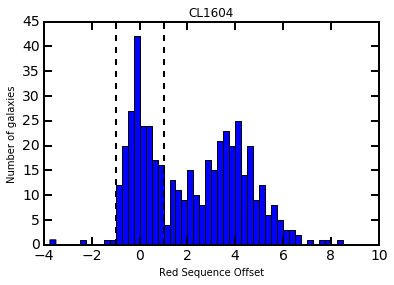

In [5]:
CMD1604.plotRSO()

I've collapsed the plot into one dimension, by calculating the offset below the red sequence for every galaxy, and dividing that offset by the red sequence width. The dashed lines in both plots correspond to each other. We can see that the red sequence is well-contained within the bounds we've set, and the blue cloud is easily differentiated as a more diffuse peak centerd around RSO = 4. In between is the area of low density we were particularly interested in. Our method of identifying the clusters is also well-tailored for defining this region (the green valley), since it can be defined in terms of the red sequence. We defined the green valley as the region where 1 < RSO < 3.

For a comparison with more conventional clustering methods, I've plotted up the result of using Gaussian Mixture Models with two components:

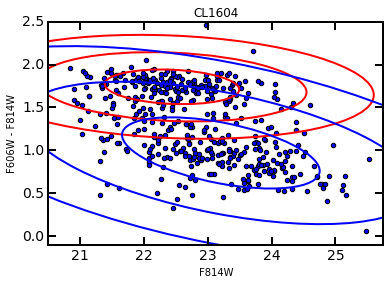

In [6]:
CMD1604.plot_CMD(xmin = 20.5, xmax = 25.75, ymin = -0.1, ymax = 2.5, show = False, plotoverride = True)
CMD1604.RSmixture()
CMD1604.plot_RSmixture(plotCMD = False)

For SC1604, the mixture models do a good job of locating both the red sequence and blue cloud. The green valley can also be located by looking at the contours in this plot.

However, SC1604 is a very rich field with a well-defined blue cloud. As a counter-example, I'll perform the same analysis on RXJ1821. This is a large, isolated galaxy cluster with far fewer member galaxies. Since it's isolated, it doesn't have much star formation going on, which means the blue cloud will be a lot sparser.

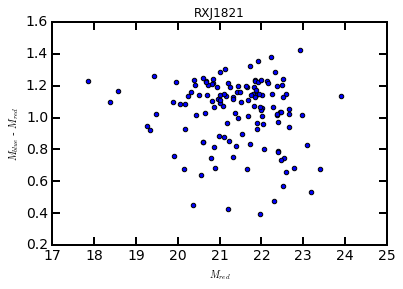

In [7]:
CMD1821 = CMD()
CMD1821.set_field('rxj1821')
CMD1821.load_spec()
CMD1821.set_CMD_mags()
CMD1821.plot_CMD()

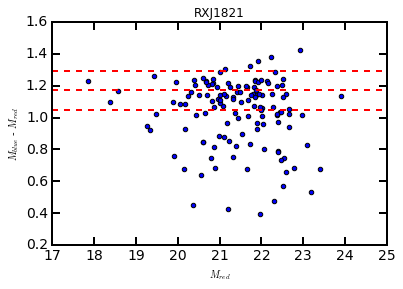

In [8]:
CMD1821.plot_CMD(show = False, plotoverride = True)
CMD1821.setRSinit(point = (21.08, 1.17), width = 0.25, slope = 0, plotCMD = False)

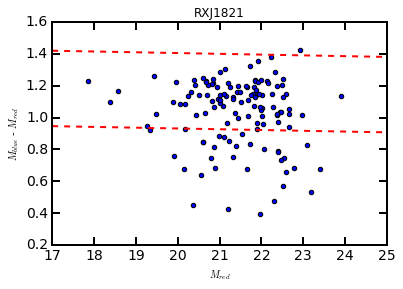

In [9]:
CMD1821.plot_CMD(show = False, plotoverride = True)
CMD1821.RSsigclip(plotCMD = False)

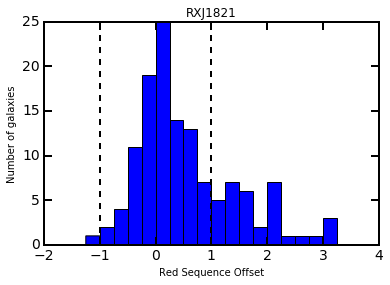

In [10]:
CMD1821.plotRSO()

After performing this analysis, we can see that the red sequence is still pretty well-defined, and it is not difficult to identify it using our method. No peak can be seen on the one-dimensional plot corresponding to the blue cloud, although we can still define the green valley as the region adjacent to the red sequence. 

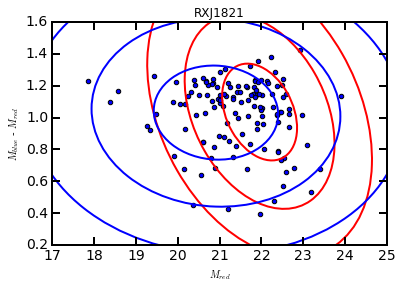

In [11]:
CMD1821.plot_CMD(show = False, plotoverride = True)
CMD1821.RSmixture()
CMD1821.plot_RSmixture(plotCMD = False)

Gaussian mixture models perform very poorly for RXJ1821. The sparseness of the blue cloud means the algorithm passes it over in favor of choosing two clusters on the red sequence. The GMM method is therefore not generally useful for the ORELSE survey. Our own method does require user initialization, but it performs well since it is narrowly tailored to identifying the red sequence.